# CMPE 258 Assignment 1 Part 1 Black Box Deep Learning

## Installing the Libraries

In [1]:
!pip install -Uqq fastai 
!pip install torchvision fastbook --upgrade

     |████████████████████████████████| 197 kB 30.1 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 719 kB 32.1 MB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 4.2 MB 72.5 MB/s 
     |████████████████████████████████| 342 kB 23.6 MB/s 
     |████████████████████████████████| 136 kB 63.0 MB/s 
     |████████████████████████████████| 212 kB 55.9 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 127 kB 55.4 MB/s 
     |████████████████████████████████| 144 kB 54.9 MB/s 
     |████████████████████████████████| 271 kB 60.9 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 596 kB 42.4 MB/s 
     |████████████████████████████████| 6.6 MB 47.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.

In [4]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.tabular.all import *
from fastai.collab import *
import pandas as pd
if torch.cuda.is_available():
  defaults.device = torch.device('cuda')

###Utility Functions

In [3]:
def add_label(x): return x[0].isupper()

## cnn_learner for image classification

In [4]:
path = untar_data(URLs.PETS)/'images'
dataset = ImageDataLoaders.from_name_func( path, get_image_files(path),label_func=add_label,item_tfms=Resize(224))
model = vision_learner(dataset, vgg16_bn, metrics=[accuracy]) #cnn_learner renamed to vision_learner
model.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.126192,0.019601,0.994587,02:41


In [7]:
result,_,probability = model.predict('/content/dog.jpg') #Supplying a dog image
print("Is this a cat ( Truth value )? "+result)
print("Probability of being a cat: "+str(float(probability[1])))

Is this a cat ( Truth value )? False
Probability of being a cat: 0.06605178862810135


## unet_learner for segmentation

In [5]:
path = untar_data(URLs.CAMVID) # camvid dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


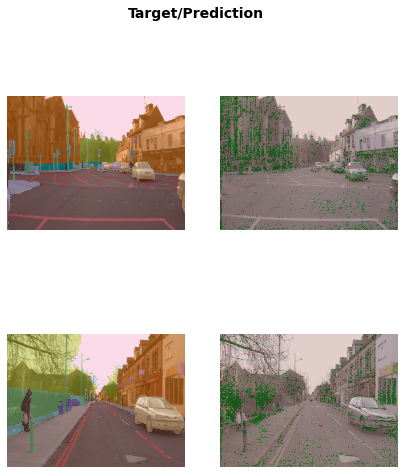

In [6]:
learn.show_results(max_n=2, figsize=(7,8))

## text_classifier_learner for sentiment analysis

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
data =  TextClasDataBunch.from_csv(path, 'texts.csv')
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.5)
learn.lr_find()
learn.fit_one_cycle(1)

In [ ]:
learn.predict('Movie was trashy. I hated it')

## tabular_learner for decisiontree

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls)

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
row, clas, probs = learn.predict(df.iloc[0])
row.show()

##  collab_learner for ranking

In [10]:
from fastai.collab import *
from fastai.tabular import *
from fastai.basics import *
# from fastai.collab import CollabDataBunch, collab_learner

epoch,train_loss,valid_loss,time
0,2.536252,2.487004,00:00


,userId,movieId,rating,rating_pred
0,82.0,14.0,2.0,2.563236
1,72.0,53.0,4.5,2.561575
2,42.0,33.0,3.0,2.512887
3,33.0,65.0,4.0,2.544330
4,78.0,58.0,2.0,2.577494
5,45.0,6.0,2.5,2.521712
6,2.0,45.0,4.5,2.540451
7,68.0,74.0,5.0,2.554887
8,80.0,18.0,5.0,2.546260


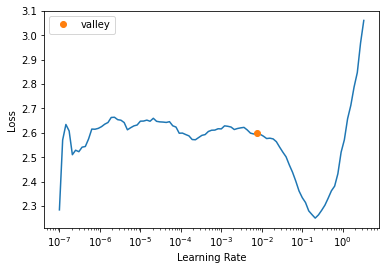

In [12]:
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings, bs=64)
learn = collab_learner(dls, y_range=(0,5))
learn.lr_find()
learn.fit_one_cycle(1)
learn.show_results()